In [1]:
#import required libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import calendar

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\ADMIN'

In [3]:
#Read Data into python
births = pd.read_csv("births.csv") 
print(births.head()) 

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [4]:
#Basic info on the dataset as follows:
print("Shape of the dataset:", births.shape)
print("First 5 records in the dataset:")
print(births.head())
print("Datatypes in the dataset:")
print(births.dtypes)
print("Missing values in the dataset:")
print(births.isnull().sum())

Shape of the dataset: (15547, 5)
First 5 records in the dataset:
   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548
Datatypes in the dataset:
year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object
Missing values in the dataset:
year        0
month       0
day       480
gender      0
births      0
dtype: int64


In [5]:
# Treat null values for column day 
births['day'].fillna(1, inplace = True)
births['day'] = births['day'].astype(int)

In [6]:
'''

if 'date' in births.columns or 'Date' in births.columns:
    date_col = 'date' if 'date' in births.columns else 'Date'
    births[date_col] = pd.to_datetime(births[date_col], errors='coerce')
    births['year'] = births[date_col].dt.year
    births['month'] = births[date_col].dt.month
    births['day'] = births[date_col].dt.day
    births['weekday'] = births[date_col].dt.day_name() '''

"\n\nif 'date' in births.columns or 'Date' in births.columns:\n    date_col = 'date' if 'date' in births.columns else 'Date'\n    births[date_col] = pd.to_datetime(births[date_col], errors='coerce')\n    births['year'] = births[date_col].dt.year\n    births['month'] = births[date_col].dt.month\n    births['day'] = births[date_col].dt.day\n    births['weekday'] = births[date_col].dt.day_name() "

In [7]:
# Summary Statistics:
births.describe().round(1)

,year,month,day,births
count,15547.0,15547.0,15547.0,15547.0
mean,1979.0,6.5,17.3,9762.3
std,6.7,3.4,15.3,28552.5
min,1969.0,1.0,1.0,1.0
25%,1974.0,4.0,8.0,4358.0
50%,1979.0,7.0,16.0,4814.0
75%,1984.0,10.0,24.0,5289.5
max,2008.0,12.0,99.0,199622.0


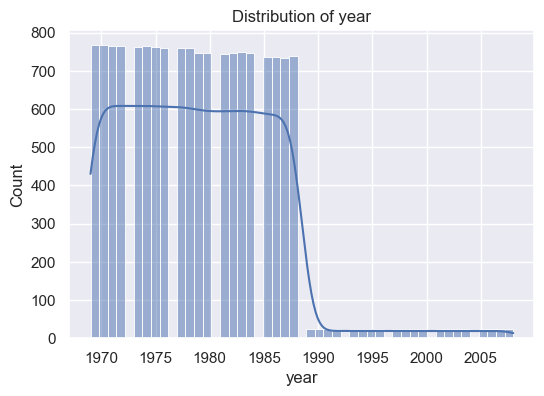

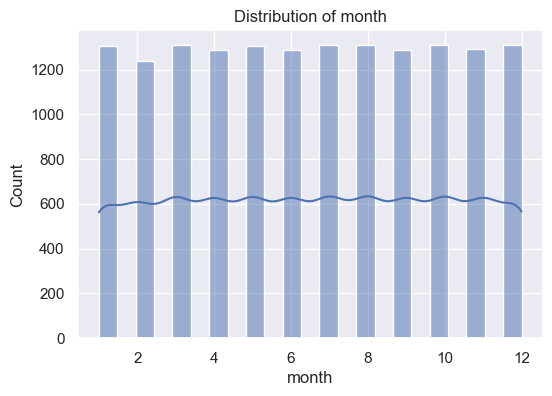

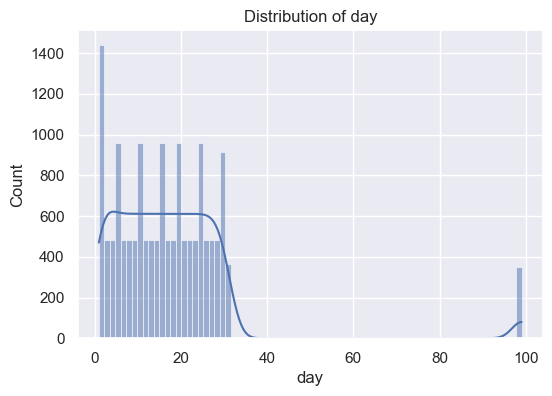

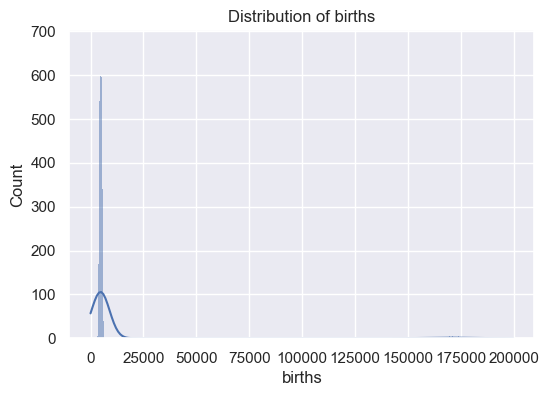

In [8]:
numeric_features = births.select_dtypes(include = np.number).columns.tolist()
for i in numeric_features:
    plt.figure(figsize = (6,4))
    sns.histplot(births[i], kde = True)
    plt.title(f'Distribution of {i}')
    plt.show()

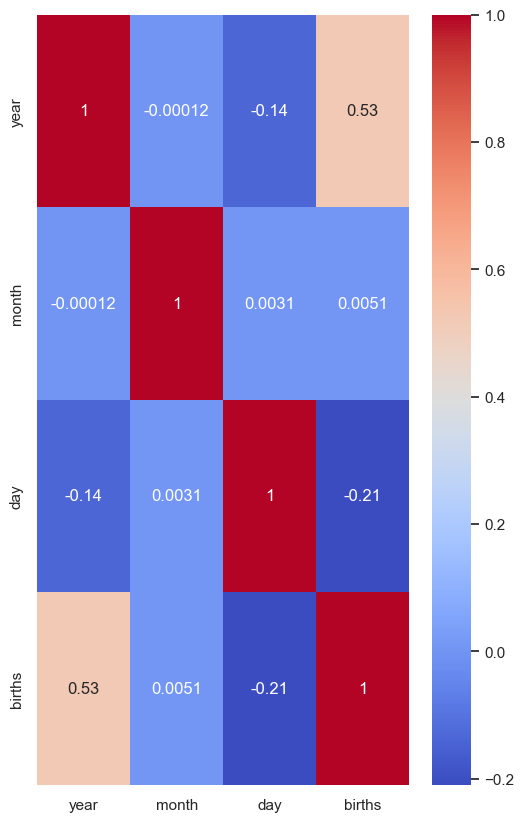

In [9]:
plt.figure(figsize=(6,10))
sns.heatmap(births[numeric_features].corr(), annot = True, cmap = 'coolwarm')
plt.show()

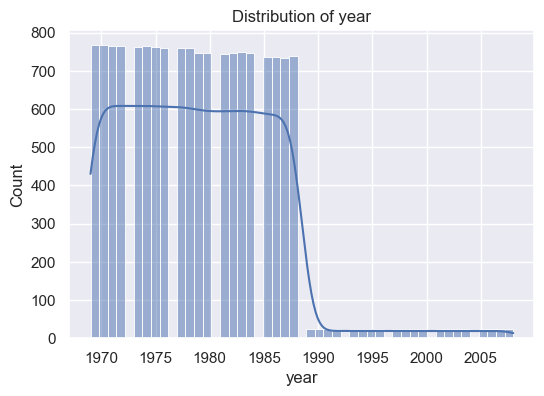

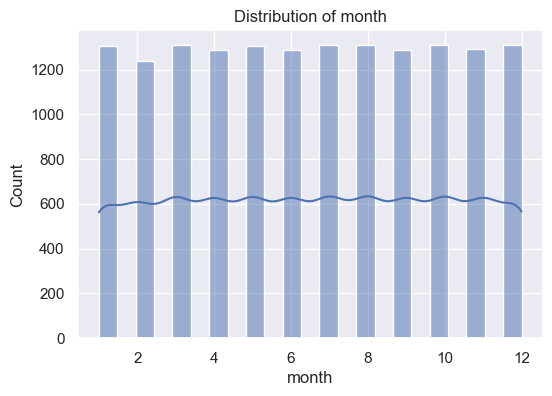

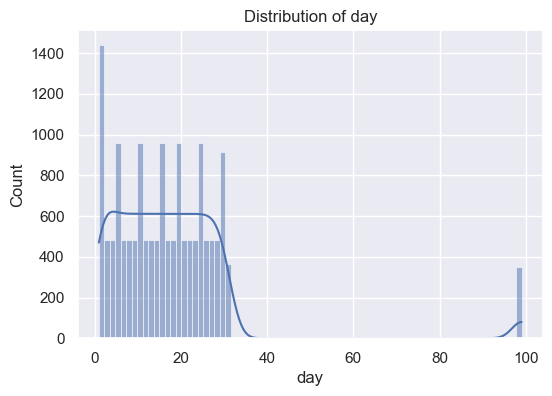

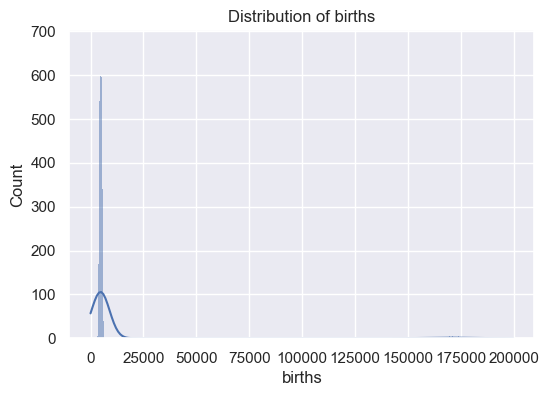

In [10]:
# 4. Univariate Analysis
numeric_cols = births.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(births[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [11]:
numeric_features

['year', 'month', 'day', 'births']

In [12]:
births['month_name'] = births['month'].apply(lambda x: calendar.month_name[x])

In [13]:
births['decade'] = 10 * (births['year'] // 10)

In [14]:
births.head()

,year,month,day,gender,births,month_name,decade
0,1969,1,1,F,4046,January,1960
1,1969,1,1,M,4440,January,1960
2,1969,1,2,F,4454,January,1960
3,1969,1,2,M,4548,January,1960
4,1969,1,3,F,4548,January,1960


In [15]:
print(births.pivot_table('births', index='decade', columns = 'gender', aggfunc = 'sum'))
print(births.pivot_table('births', index='month', columns = 'gender', aggfunc = 'sum'))

gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428
gender        F        M
month                   
1       6035447  6328750
2       5634064  5907114
3       6181613  6497231
4       5889345  6196546
5       6145186  6479786
6       6093026  6428044
7       6512299  6855257
8       6600723  6927284
9       6473029  6779802
10      6330549  6624401
11      5956388  6241579
12      6184154  6472761


In [16]:
#Add decade as new data & create pivot to check the Male & Female count
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')


gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


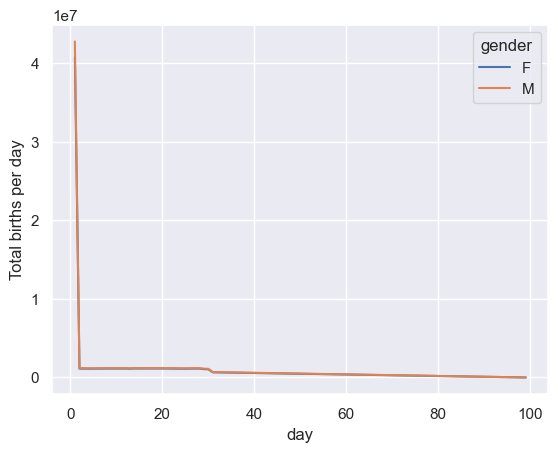

In [17]:
birth_day = births.pivot_table('births', index = 'day', columns = 'gender', aggfunc = 'sum')
birth_day.plot()
plt.ylabel("Total births per day")
plt.show()

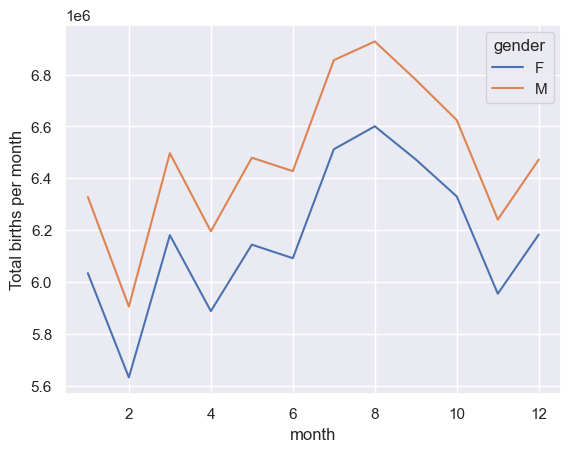

In [18]:
birth_month = births.pivot_table('births', index = 'month', columns = 'gender', aggfunc = 'sum')
birth_month.plot()
plt.ylabel("Total births per month")
plt.show()

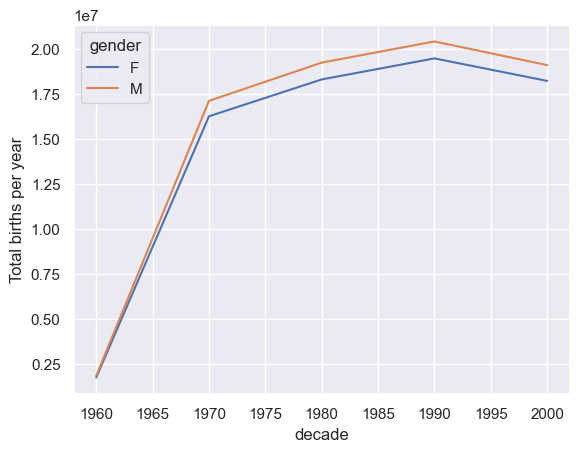

In [19]:
birth_decade = births.pivot_table('births', index='decade', columns = 'gender', aggfunc='sum' )
birth_decade.plot()
plt.ylabel("Total births per year") 
plt.show()

### Further data exploration:

In [20]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [21]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

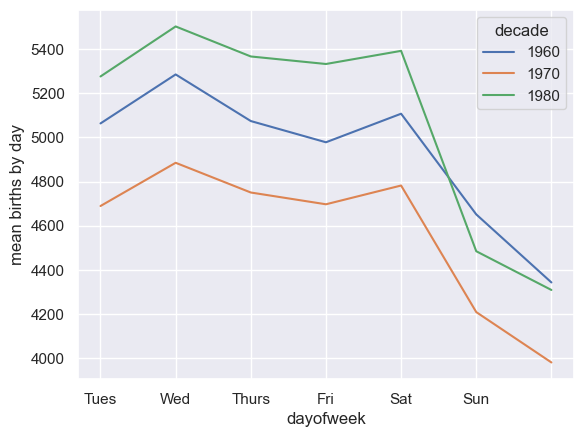

In [22]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

In [23]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())



       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625


In [24]:
births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

AttributeError: module 'pandas' has no attribute 'datetime'

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()